In [1]:
# For inline plotting
%matplotlib inline

# For auto reloading
%load_ext autoreload
%autoreload 2

# Three-armed bandit

## Simulation parameters

| $N$ | $\theta_1$ | $\theta_2$ | $\theta_3$ |
|------|------|-----|-----|
| $10000$ | $0.4$ | $0.6$ | $0.8$ |

## The oracle value

For $N = 10000$, the theoretically maximized expectation of aggregated rewards over $N$ time slots is
$$\max \mathbb{E} \left[ \sum\limits_{t=1}^{N} r_{I(t)} \right] = \max \sum\limits_{t=1}^{N} \theta_{I(t)} = N \cdot \theta_{I^*} = 10000 \cdot 0.8 = 8000$$

## Reward function

In [2]:
from machine import get_reward

for i in [0, 1, 2, 3, 4, 0.5]:
    print('get_reward({}) returns {}'.format(i, get_reward(i)))

get_reward(0) returns -1
get_reward(1) returns 0
get_reward(2) returns 0
get_reward(3) returns 1
get_reward(4) returns -1
get_reward(0.5) returns -1


# Basic setup

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# $\epsilon$-greedy simulations

Agent '$\epsilon$-greedy with $\epsilon = 0.1$' completed.
Agent '$\epsilon$-greedy with $\epsilon = 0.5$' completed.
Agent '$\epsilon$-greedy with $\epsilon = 0.9$' completed.


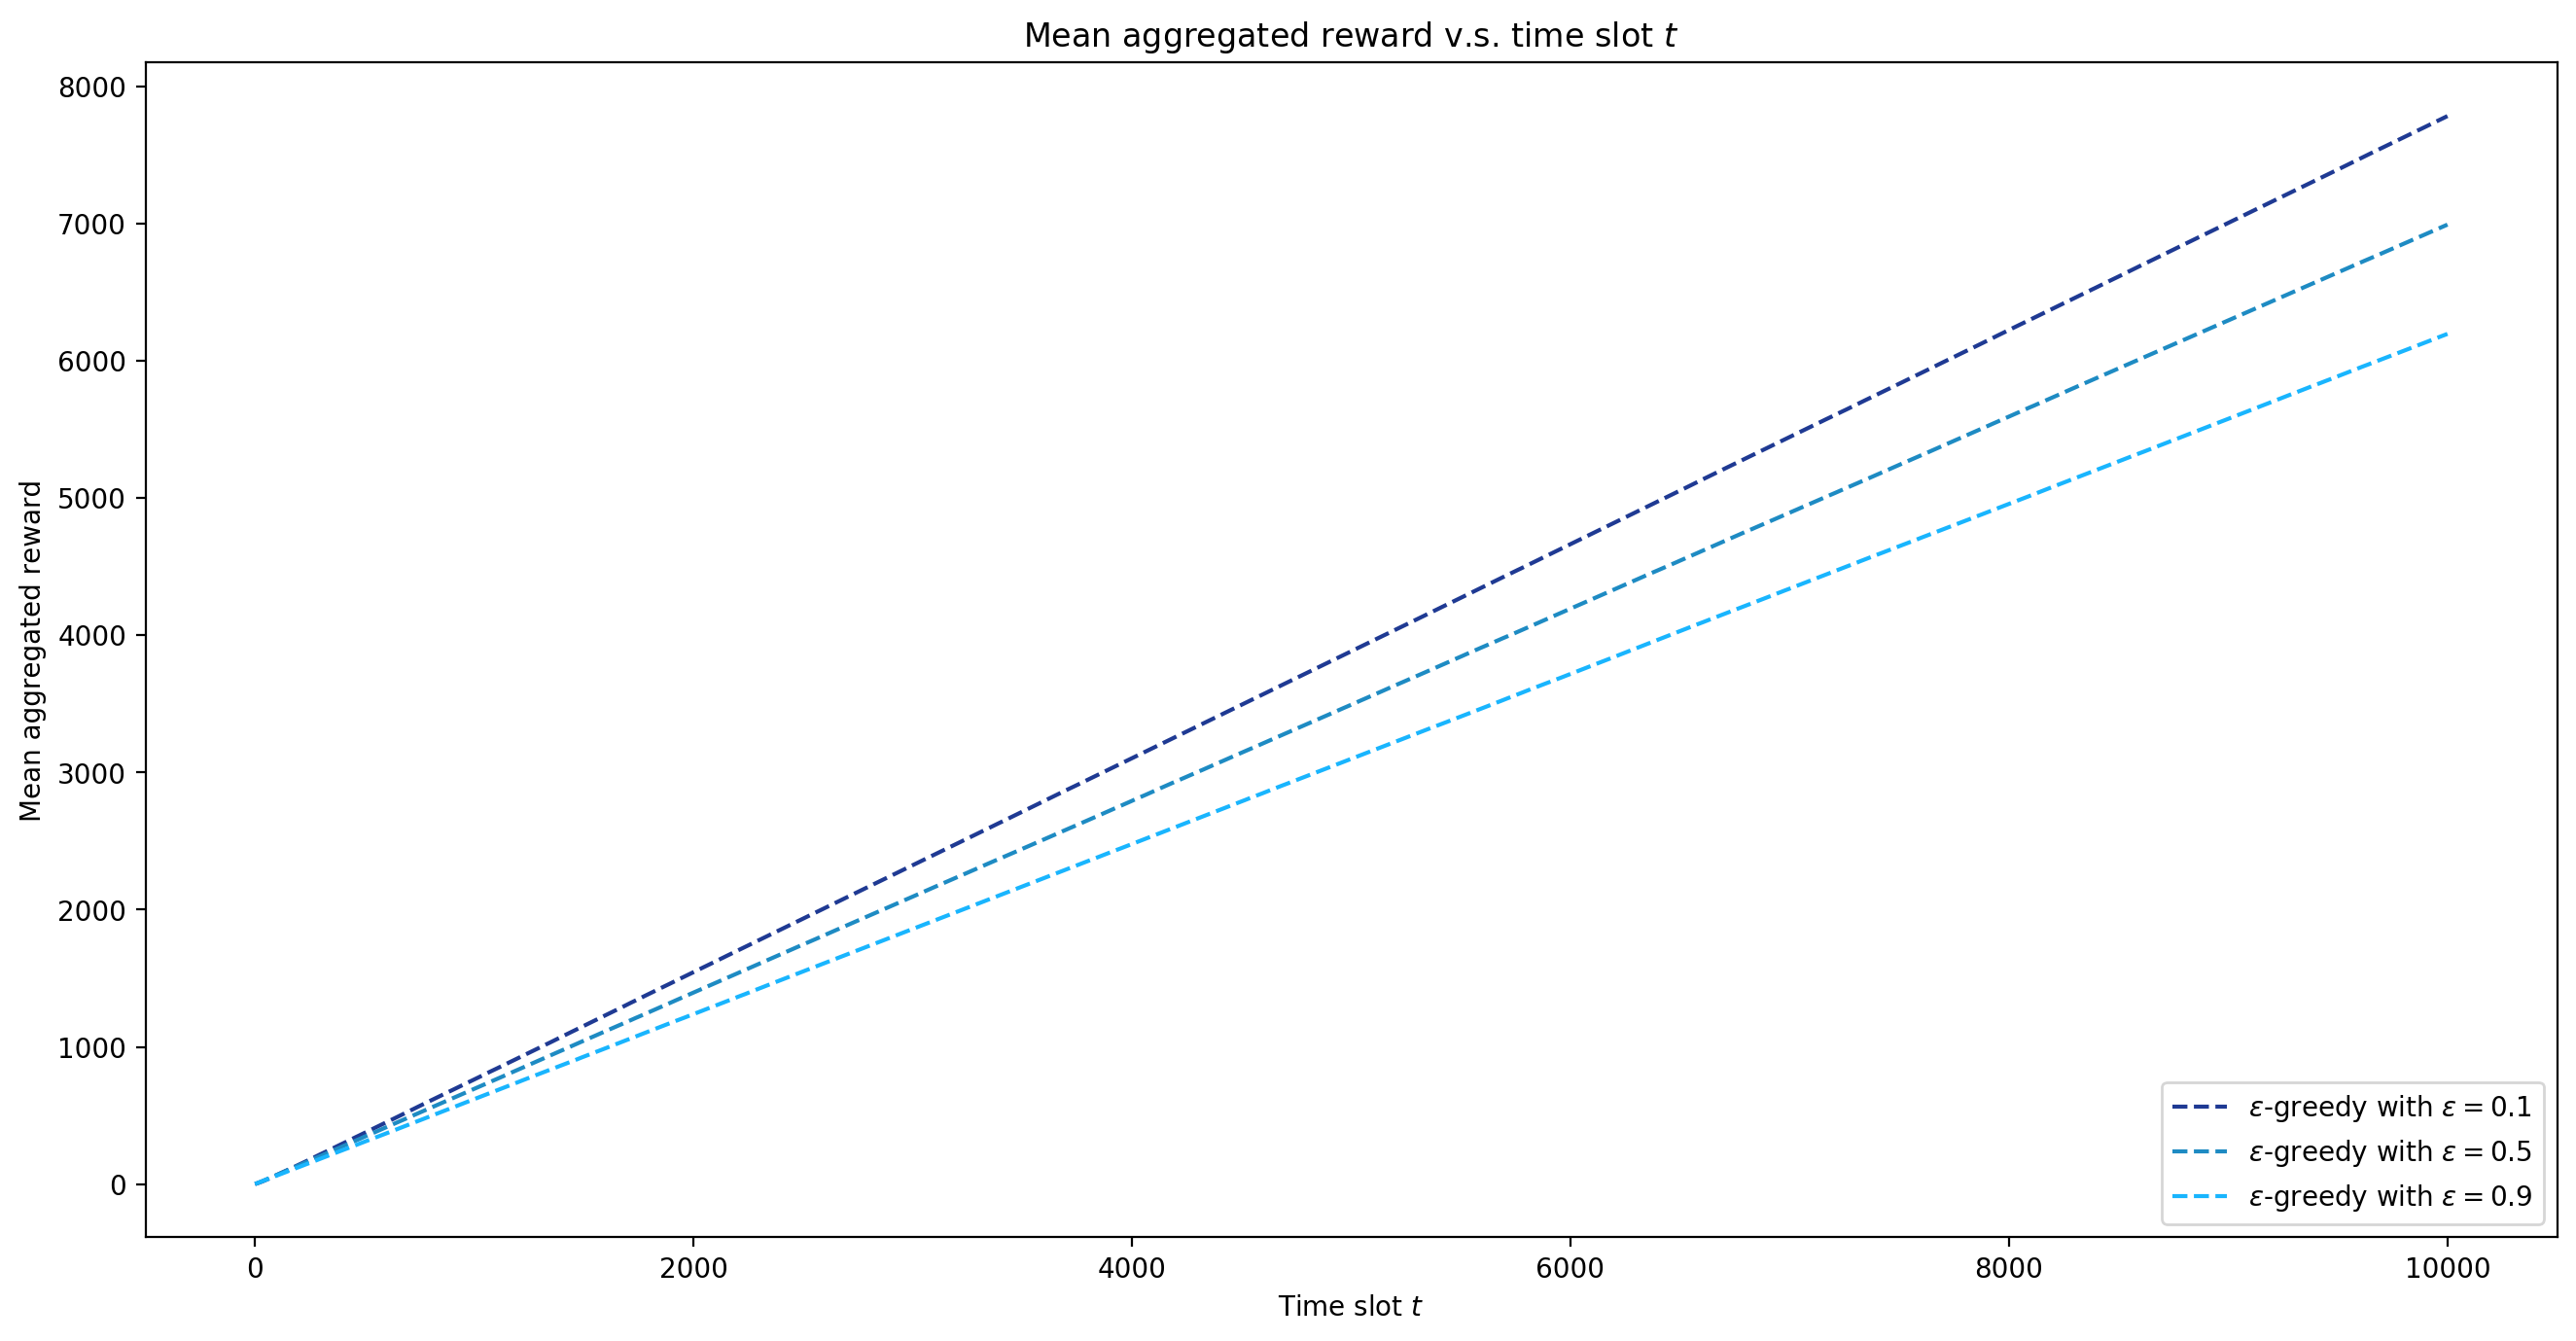

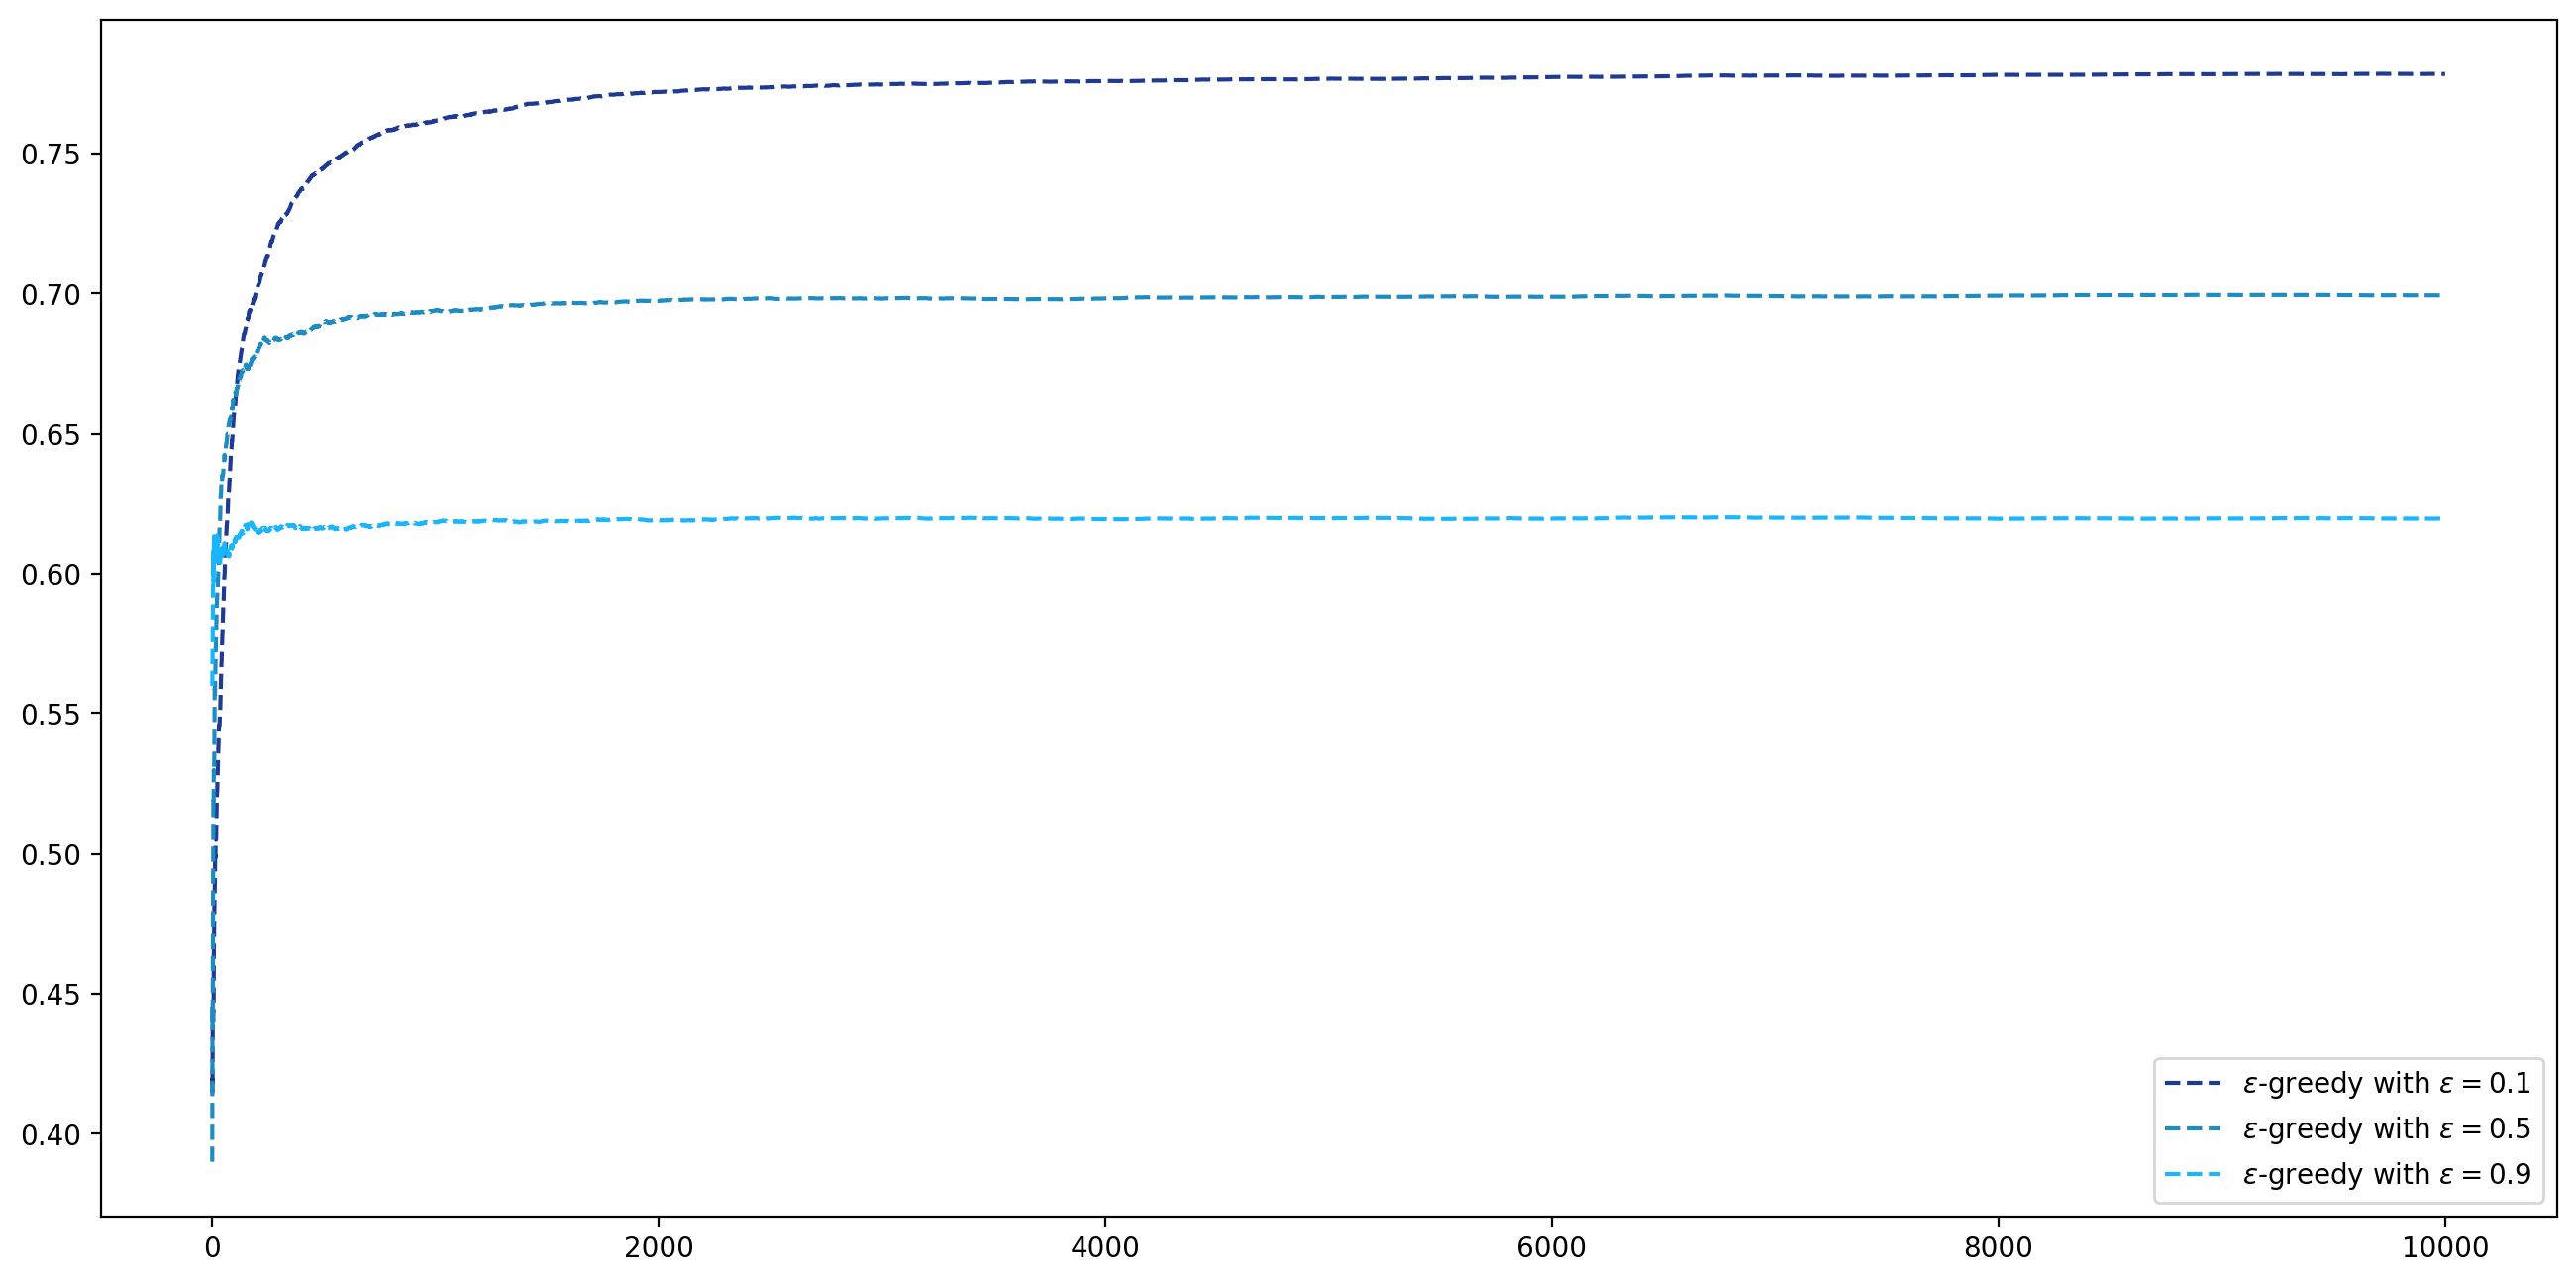

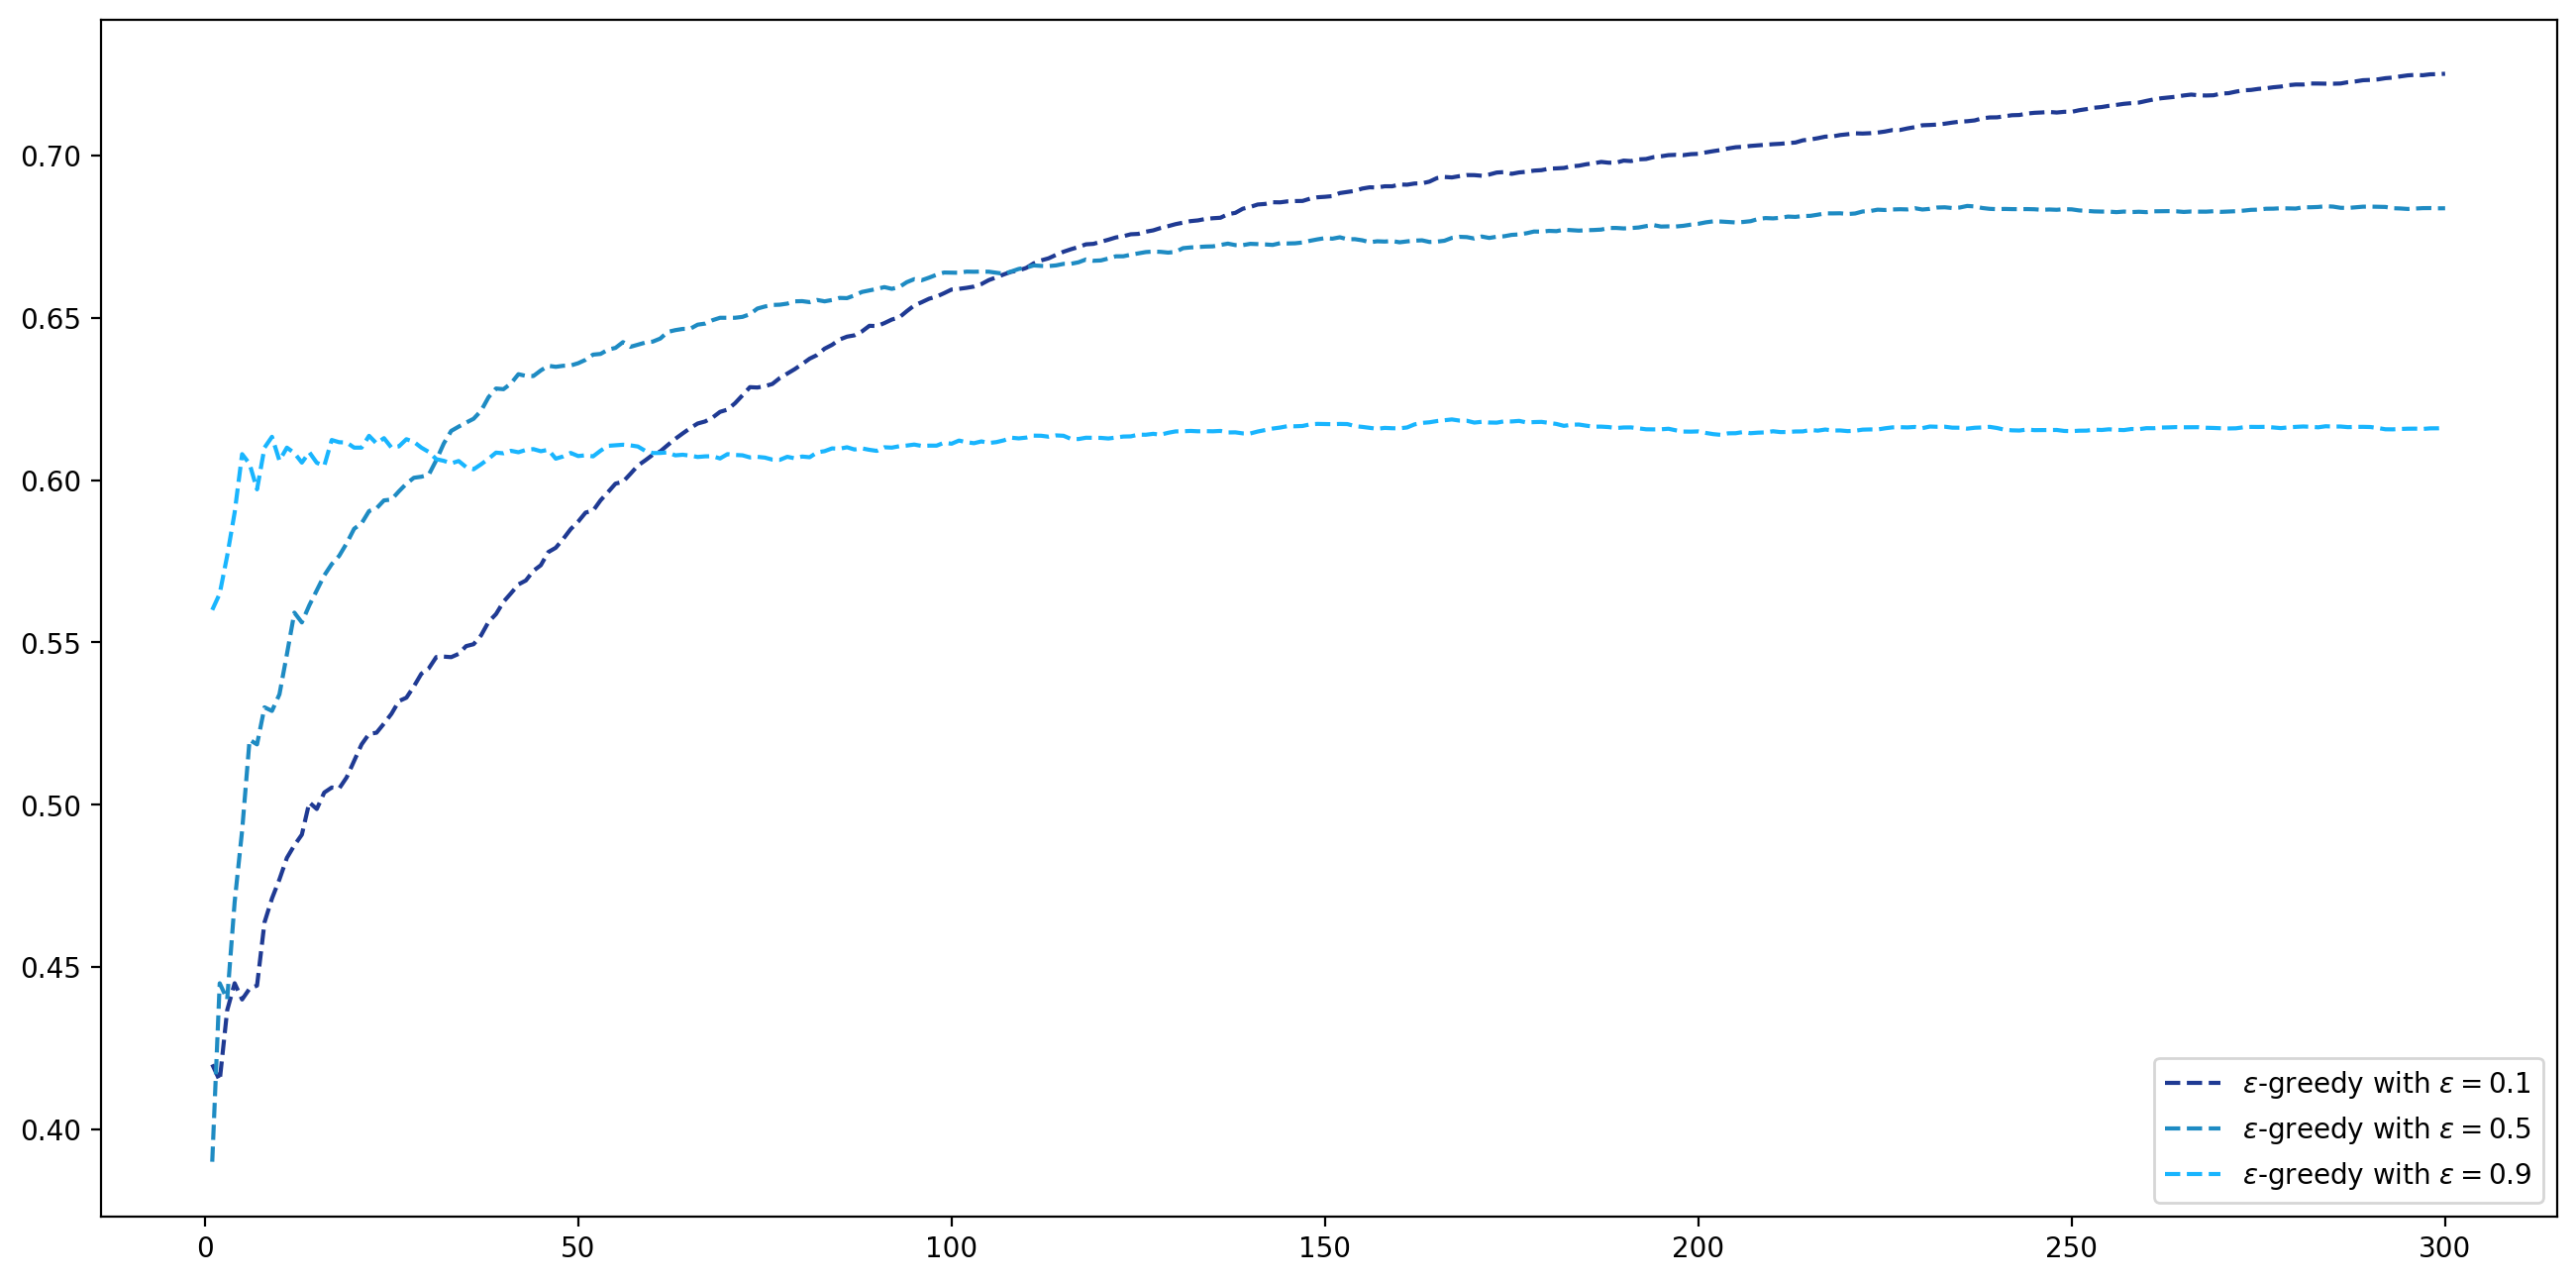

In [4]:
from simulator import Simulator
from agent import EpsilonGreedyAgent


agent1 = EpsilonGreedyAgent(epsilon=0.1)
agent2 = EpsilonGreedyAgent(epsilon=0.5)
agent3 = EpsilonGreedyAgent(epsilon=0.9)

sim = Simulator(number_of_time_slot=10000, number_of_repetition=100)
sim.run_agent(agent1)
sim.run_agent(agent2)
sim.run_agent(agent3)

sim.plot()

# UCB simulations

Agent 'UCB with c = 1' completed.
Agent 'UCB with c = 5' completed.
Agent 'UCB with c = 10' completed.


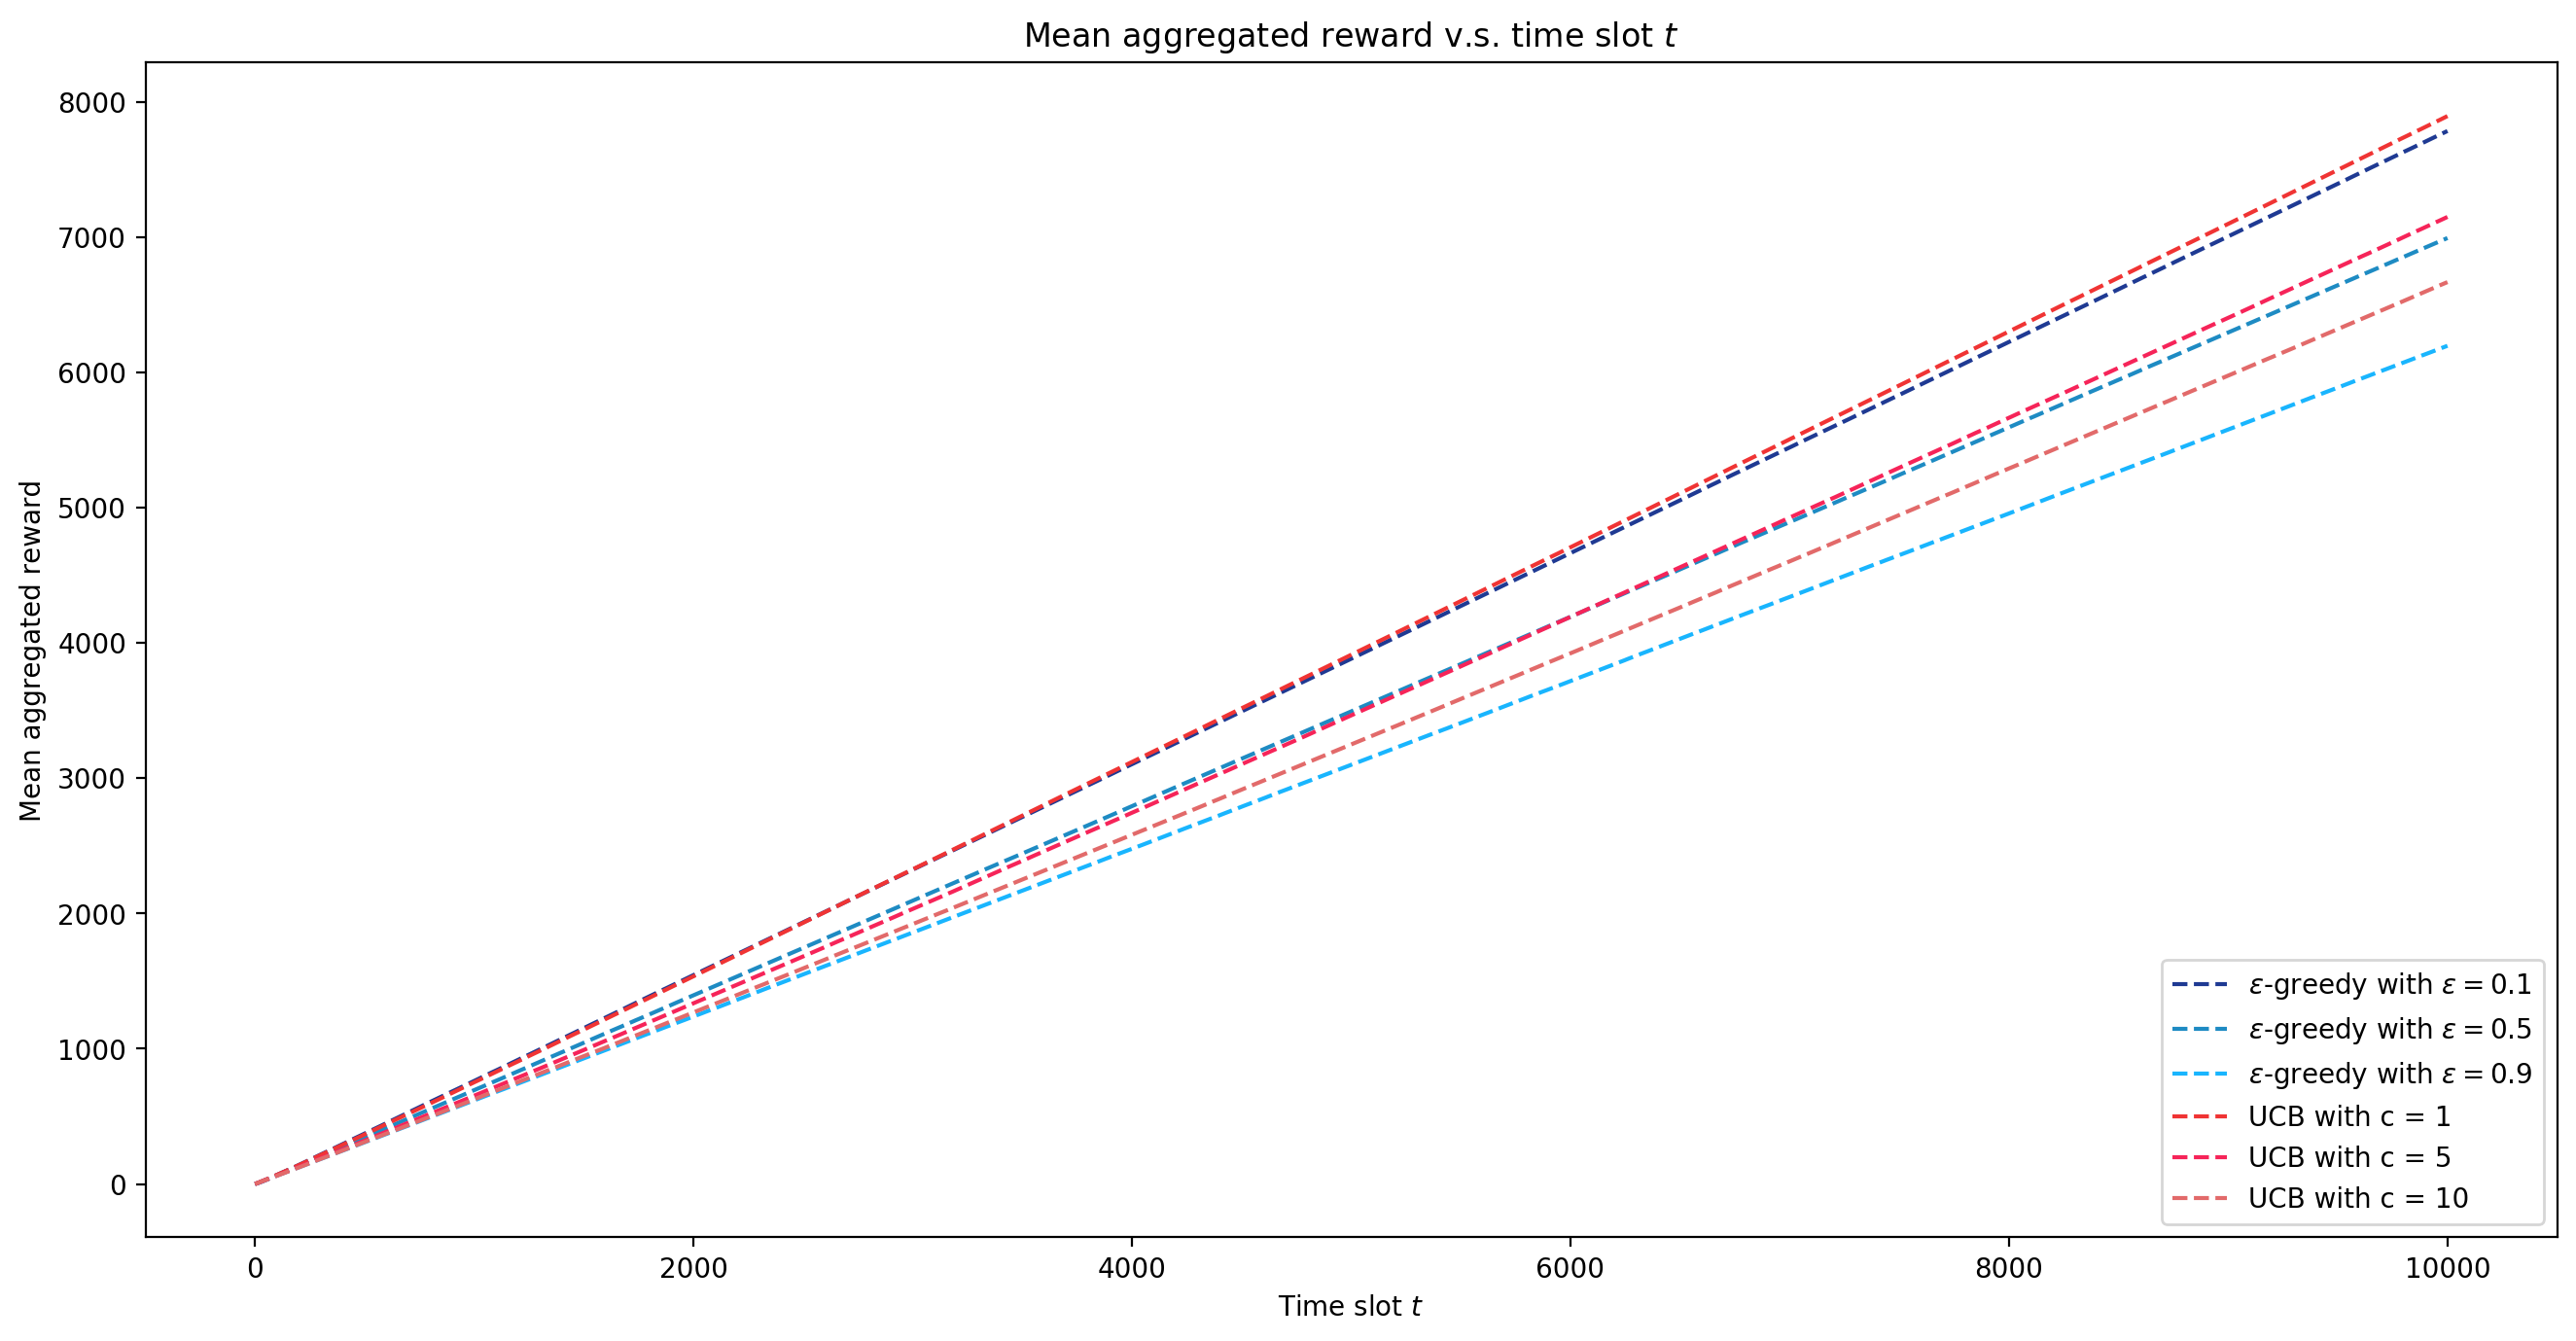

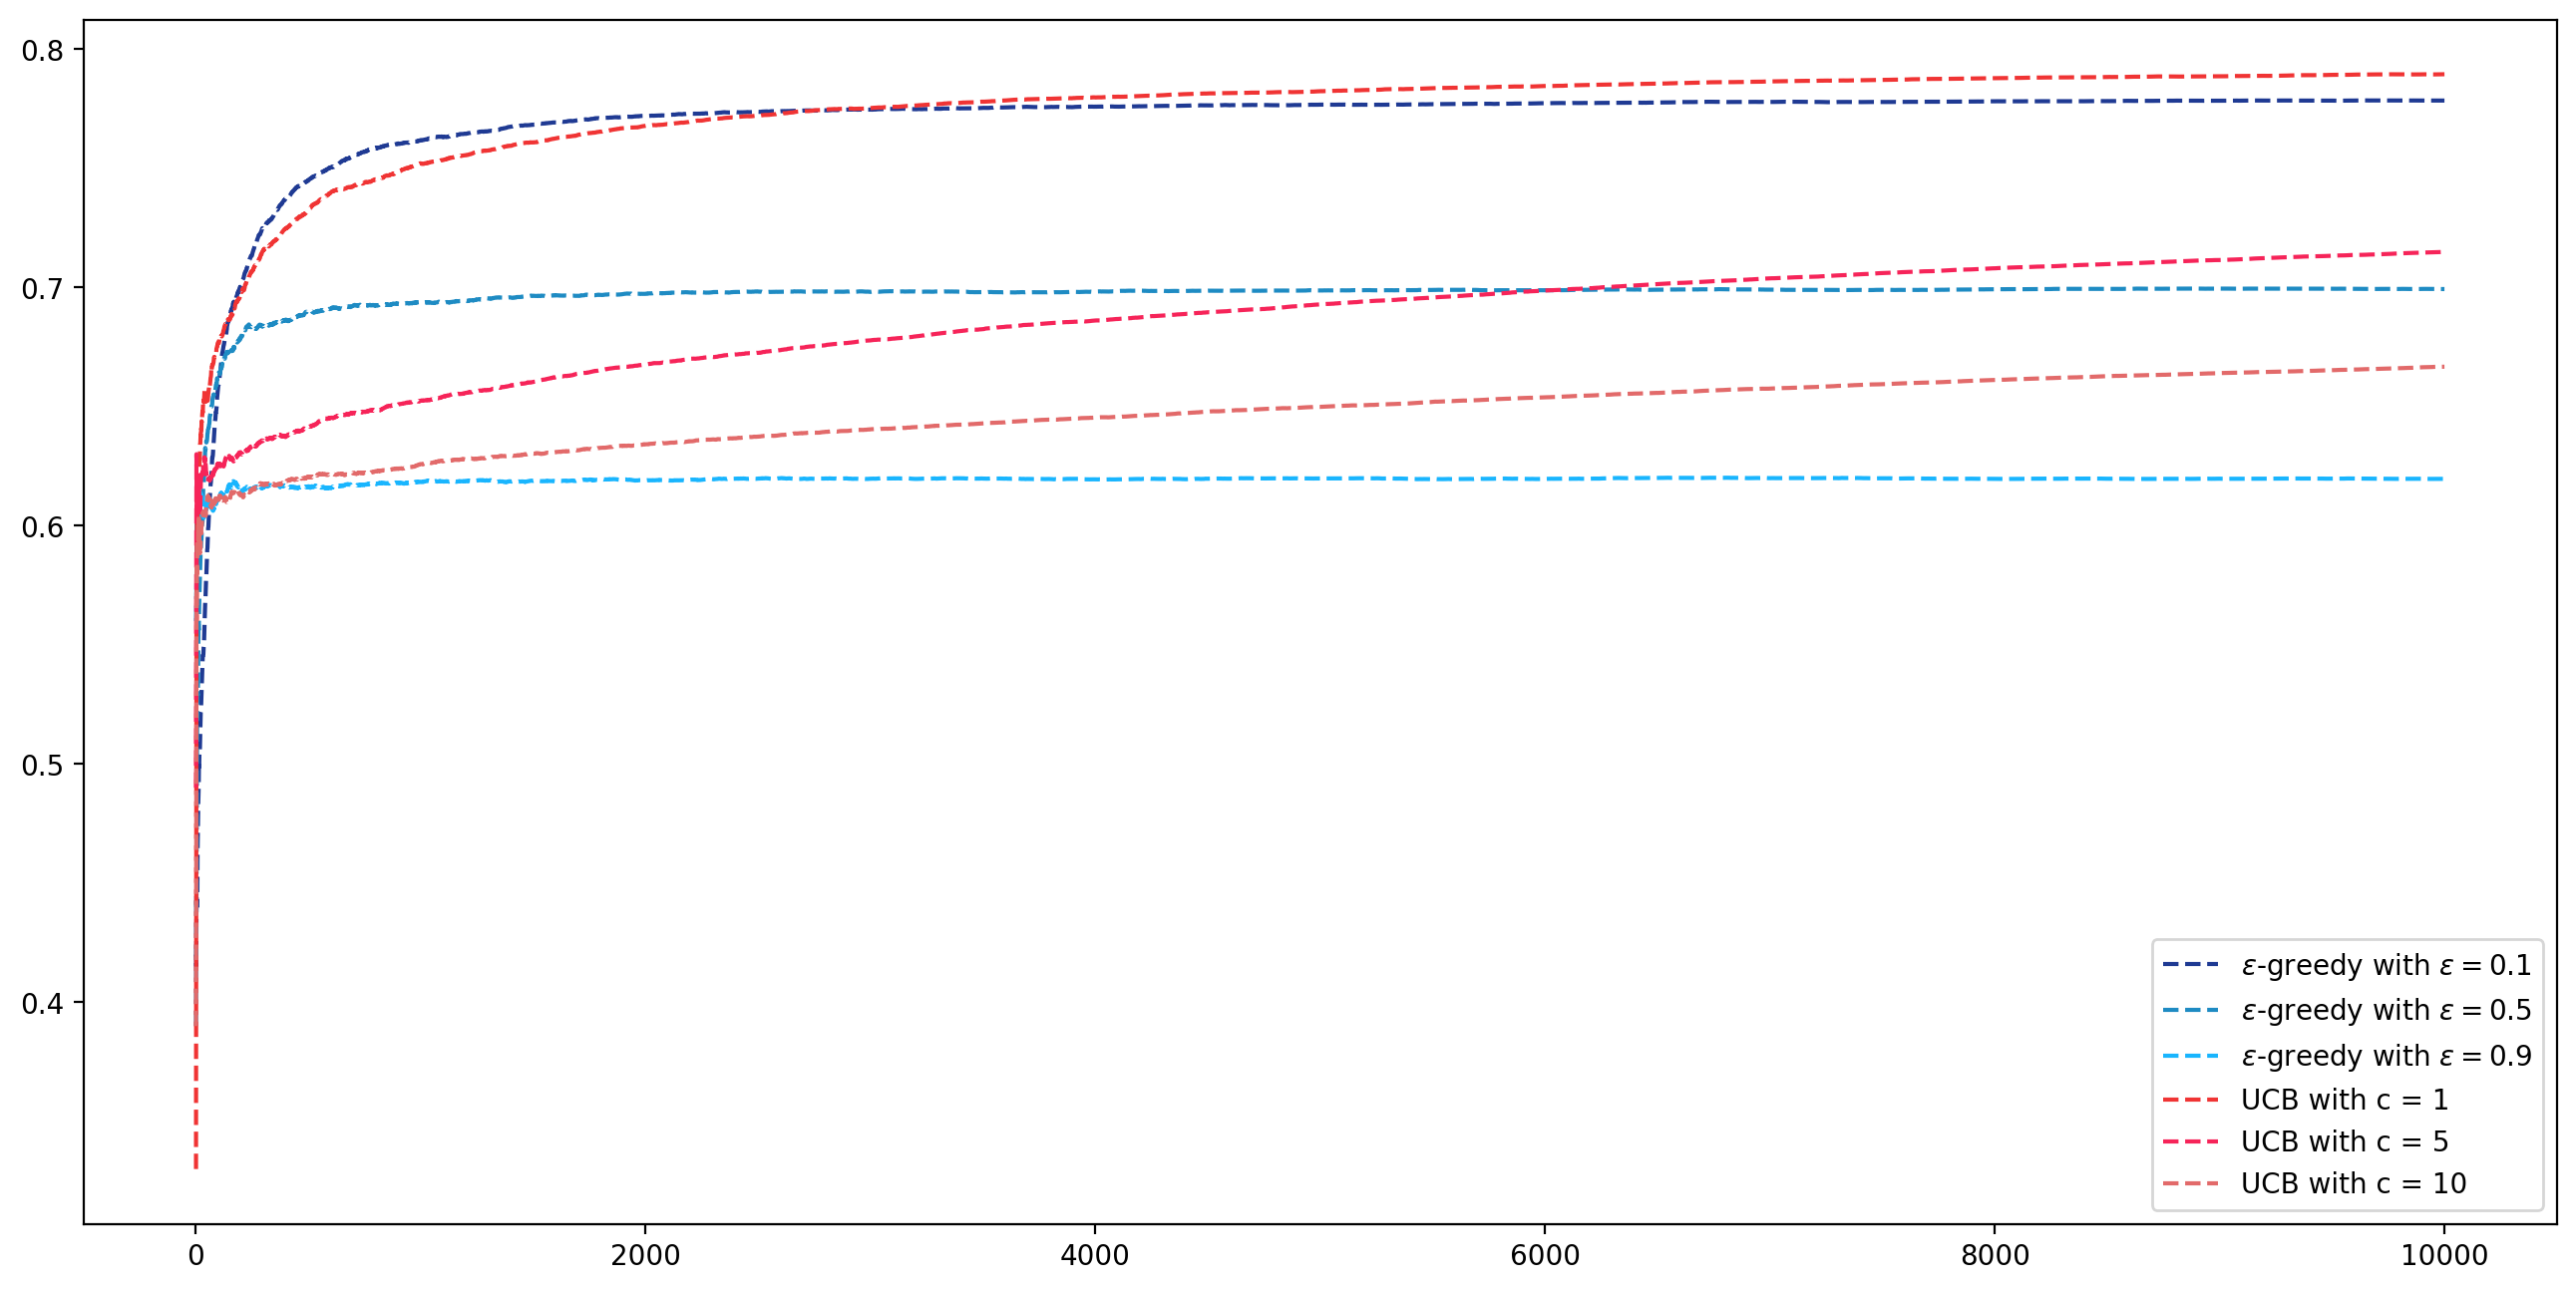

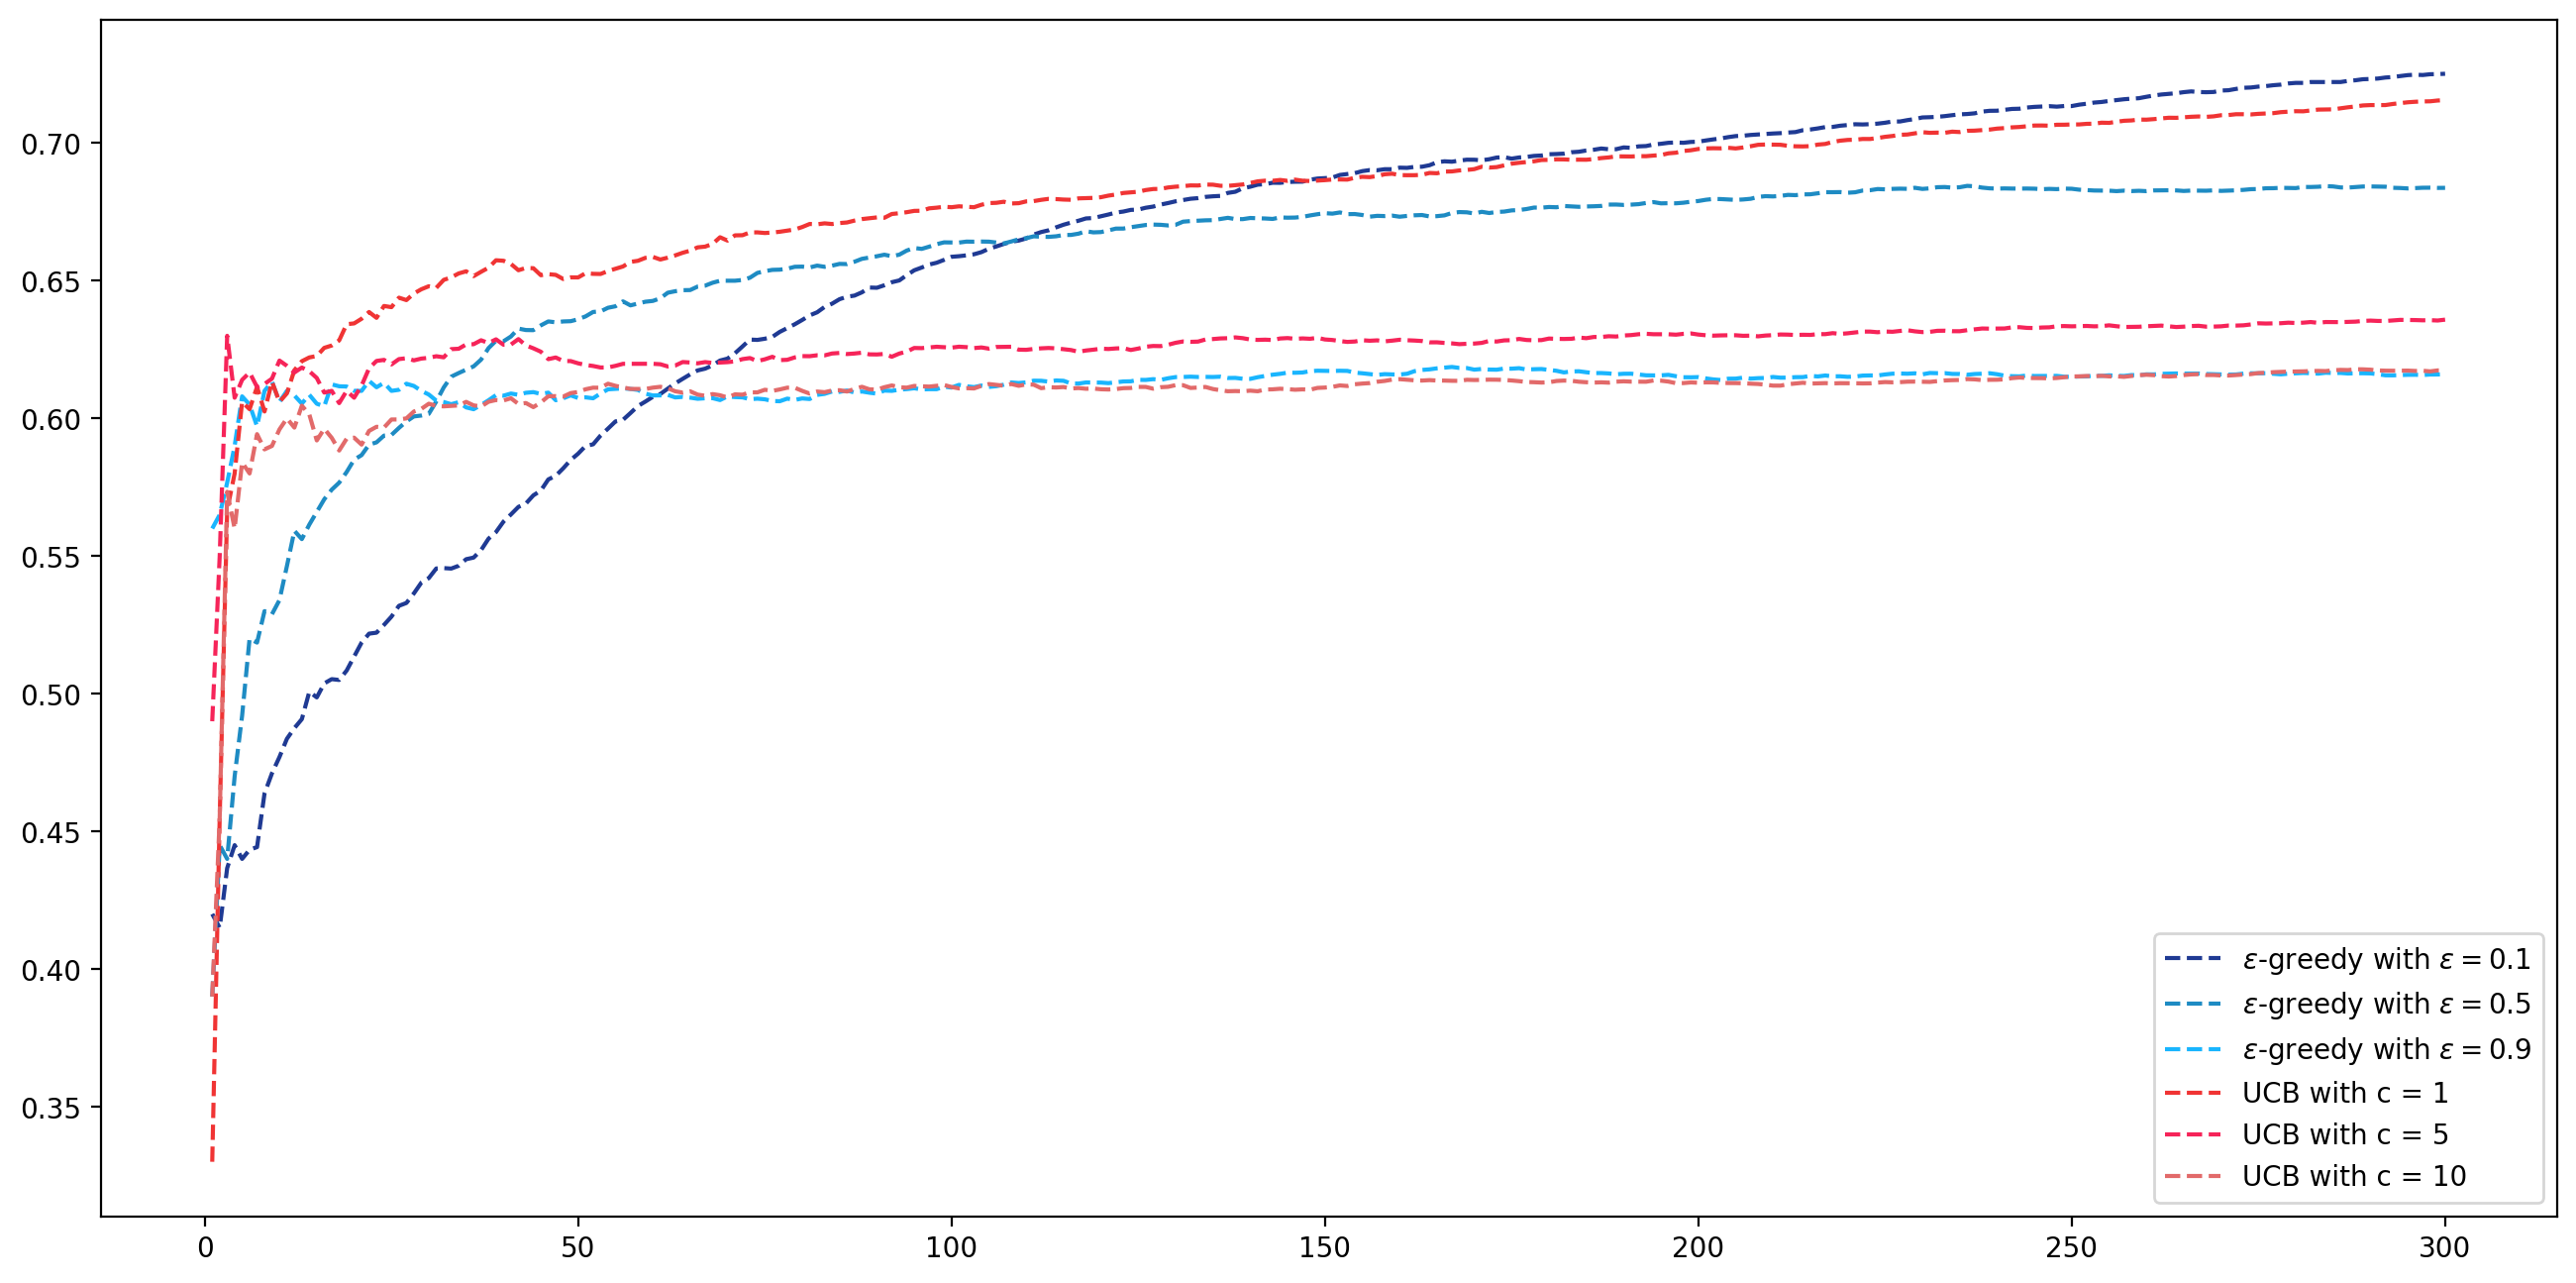

In [5]:
from agent import UcbAgent


for agent in [UcbAgent(c=c) for c in [1, 5, 10]]:
    sim.run_agent(agent)

sim.plot()

# Thompson sampling simulations

Agent 'TS with \$\{(\alpha_1, \beta_1) = (1, 1), (\alpha_2, \beta_2) = (1, 1), (\alpha_3, \beta_3) = (1, 1)\}\$' completed.
Agent 'TS with \$\{(\alpha_1, \beta_1) = (2, 3), (\alpha_2, \beta_2) = (4, 4), (\alpha_3, \beta_3) = (6, 2)\}\$' completed.


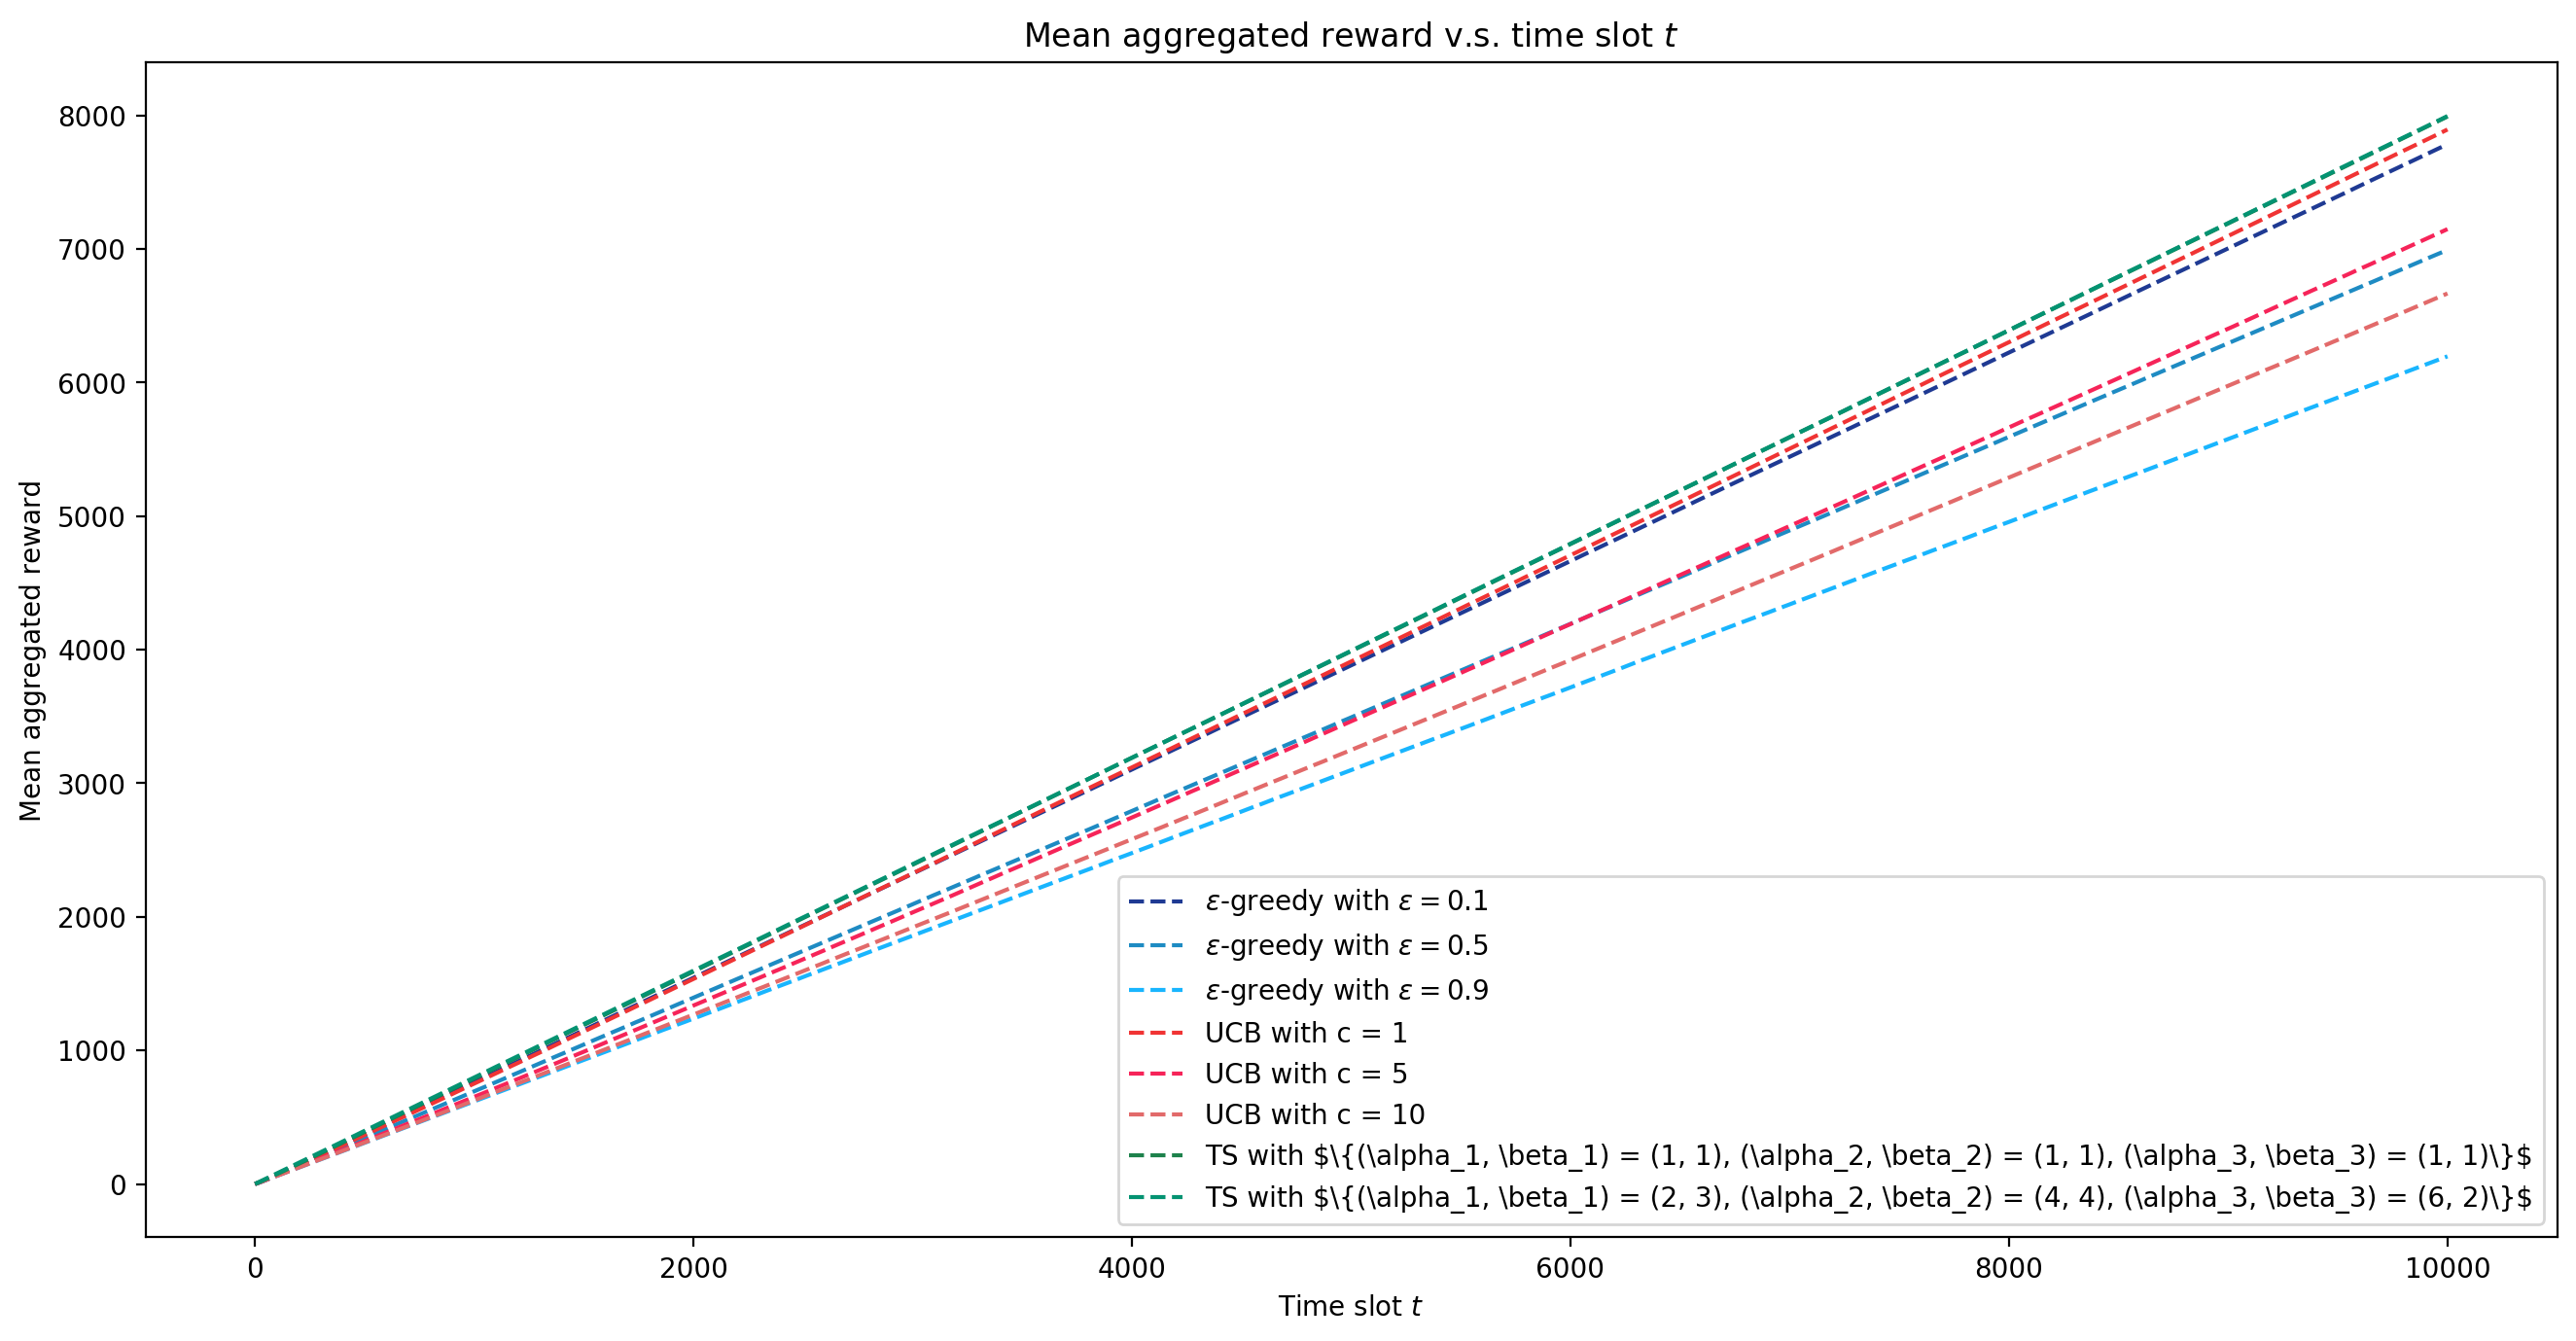

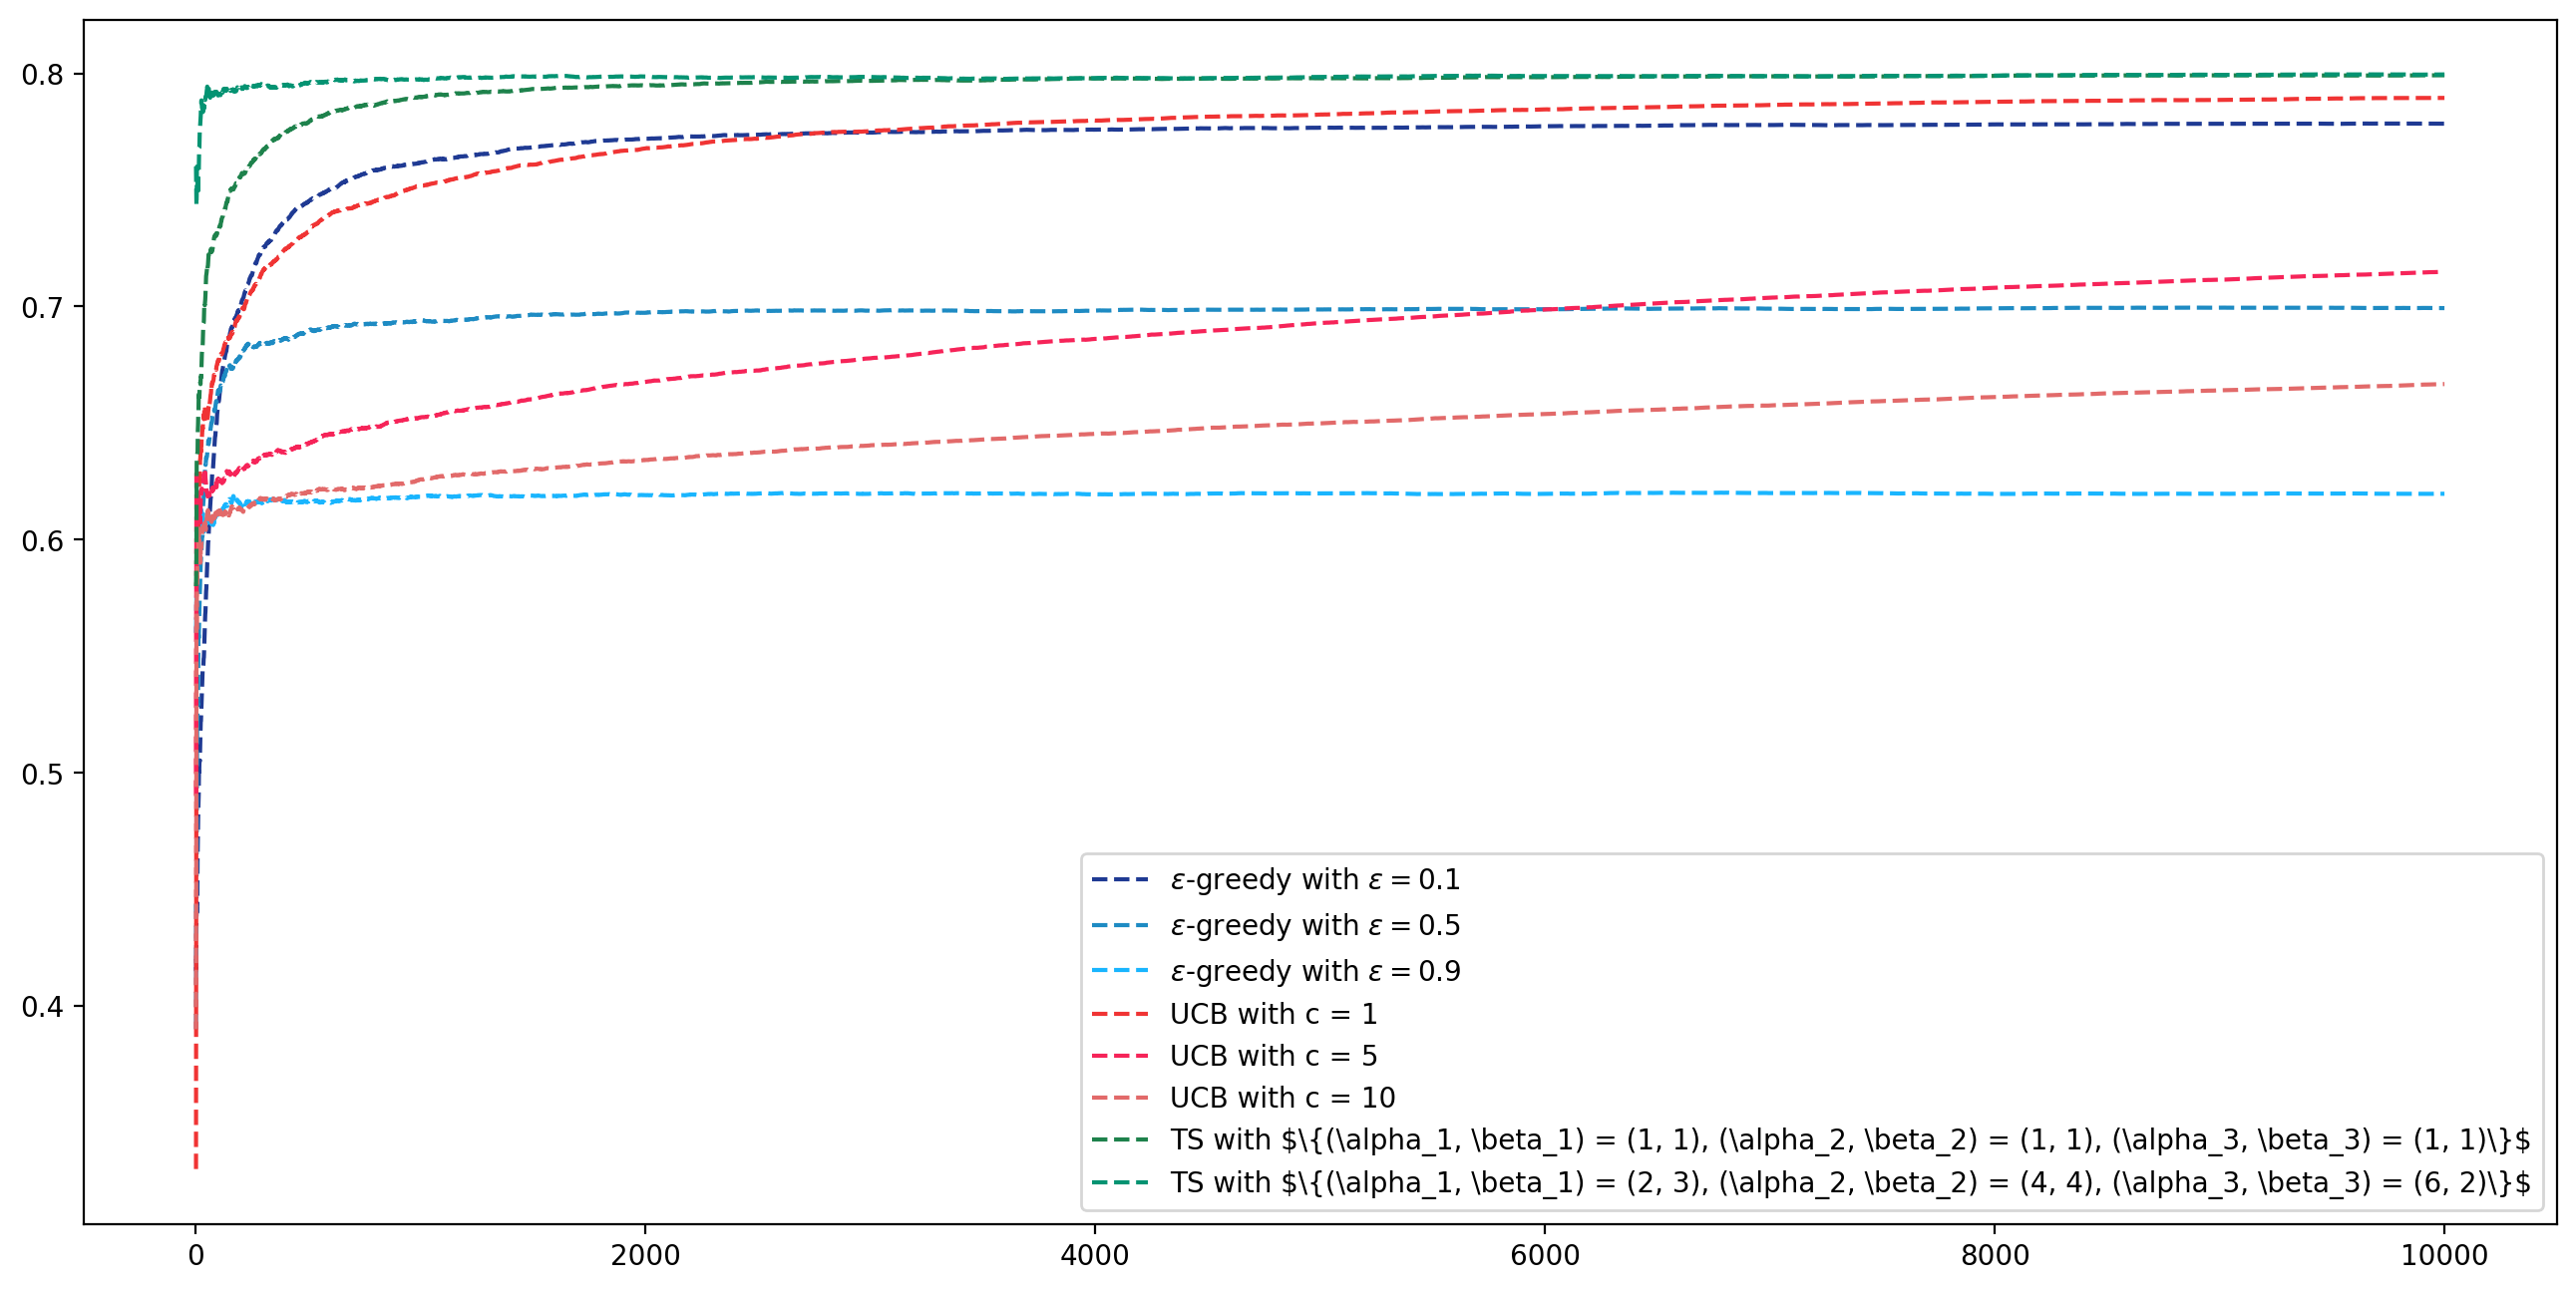

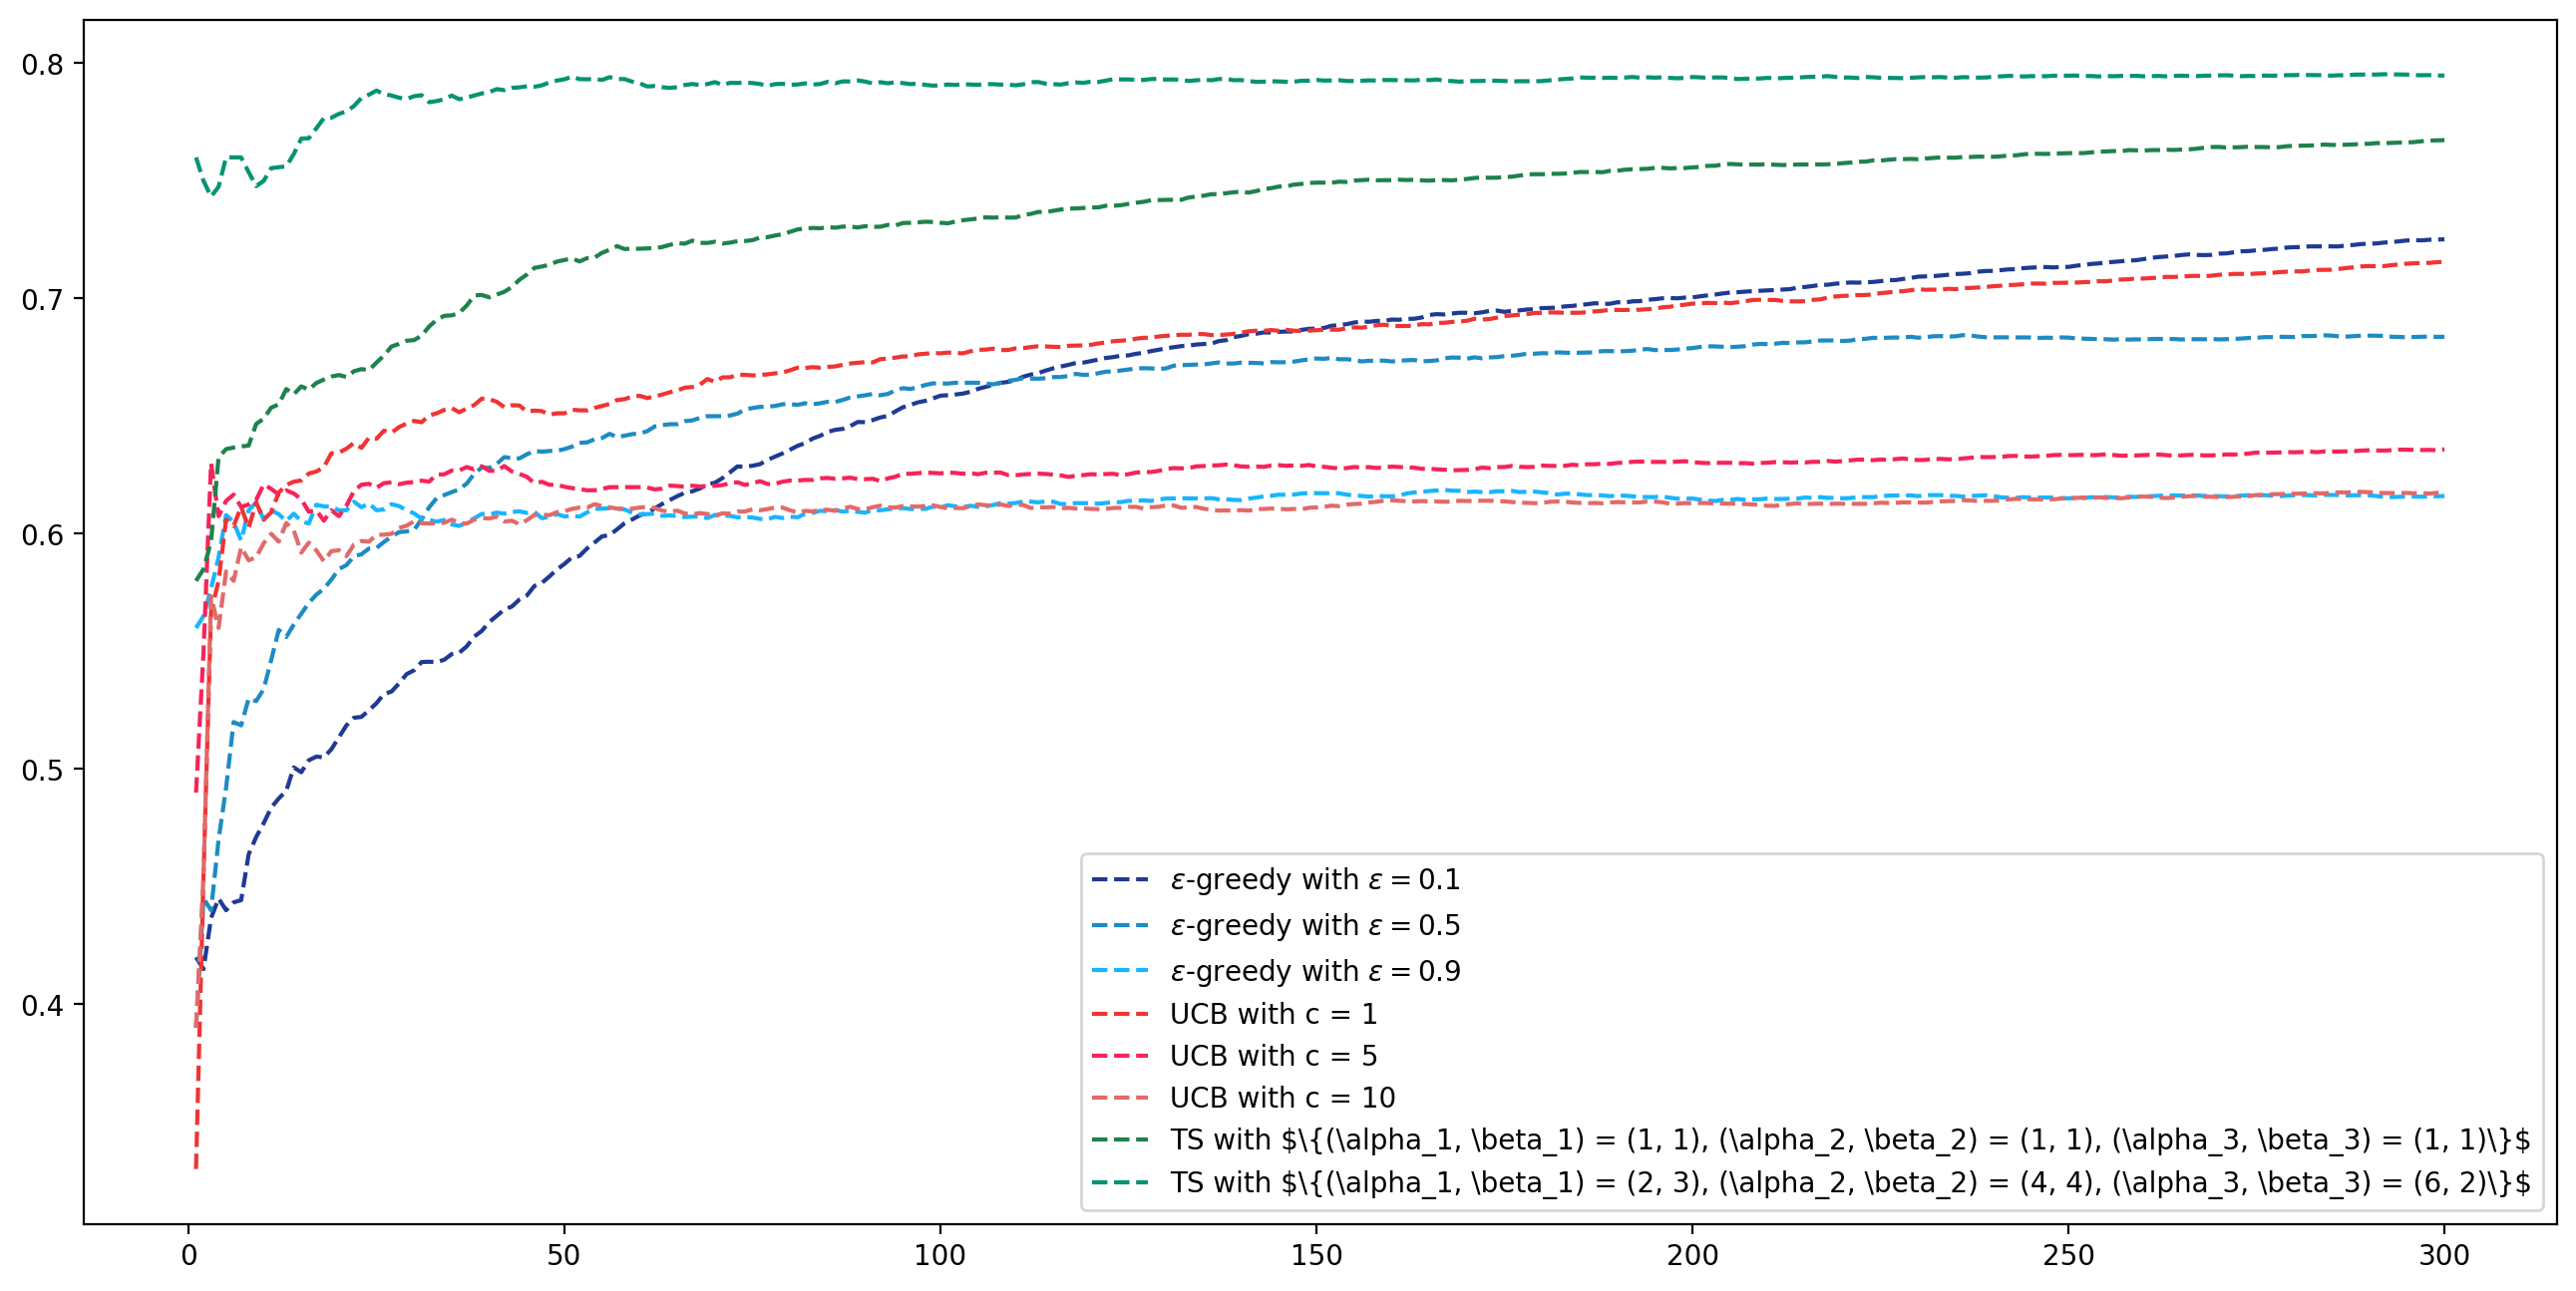

In [6]:
from agent import TsAgent

tsAgent1 = TsAgent(alpha_list=[1, 1, 1], beta_list=[1, 1, 1])
tsAgent2 = TsAgent(alpha_list=[2, 3, 4], beta_list=[4, 6, 2])

sim.run_agent(tsAgent1)
sim.run_agent(tsAgent2)

sim.plot()